# XJTU-SY 베어링 RUL 회귀 실습 (Sample 노트북)

이 노트북은 교육생이 직접 코드를 채워 넣으며 RUL 회귀 파이프라인을 구현해 볼 수 있도록 구성된 예제입니다.
각 코드 셀에는 `TODO` 주석으로 구현해야 할 부분이 표시되어 있습니다.


In [8]:
import sys
from pathlib import Path

# 현재 노트북 파일이 notebooks/ 폴더 안에 있다고 가정
this_file = Path.cwd()  # 보통은 notebooks/ 경로
project_root = this_file.parent  # notebooks/ 상위 디렉토리 = 프로젝트 루트

# 혹시 다른 데서 켰다면, 직접 경로를 지정해도 됨:
# project_root = Path(r"C:/어디/어디/samsung-rul-xjtu-sy")

if str(project_root) not in sys.path:
    sys.path.append(str(project_root))

print("project_root:", project_root)
print("sys.path 에 추가됨:", project_root in map(Path, sys.path))

project_root: c:\Users\dhshs\Downloads\samsung-edu-kjh
sys.path 에 추가됨: True


In [9]:
import os
from pathlib import Path

import numpy as np
import torch
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt

from src.data_utils import build_dataset
from src.models import RULLSTM, count_parameters

# 프로젝트 루트 및 데이터 경로 설정
project_root = Path.cwd().parent  # notebooks/ 상위 디렉토리를 프로젝트 루트로 가정
raw_root = project_root / "data" / "raw" / "XJTU-SY_Bearing_Datasets"

window_size = 20
stride = 1
max_rul = 125.0

batch_size = 64
num_epochs = 100
lr = 1e-3

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Project root:", project_root)
print("Raw data root:", raw_root)
print("Device:", device)


Project root: c:\Users\dhshs\Downloads\samsung-edu-kjh
Raw data root: c:\Users\dhshs\Downloads\samsung-edu-kjh\data\raw\XJTU-SY_Bearing_Datasets
Device: cpu


In [10]:
# 학습/검증/테스트용 윈도우 데이터 생성
(train_X, train_y), (val_X, val_y), (test_X, test_y) = build_dataset(
    raw_root=str(raw_root),
    window_size=window_size,
    stride=stride,
    max_rul=max_rul,
    split_config=None,  # 기본 run 분할 규칙 사용
)

print("Train X:", train_X.shape, "Train y:", train_y.shape)
print("Val   X:", val_X.shape, "Val   y:", val_y.shape)
print("Test  X:", test_X.shape, "Test  y:", test_y.shape)


Train X: (521, 20, 6) Train y: (521,)
Val   X: (614, 20, 6) Val   y: (614,)
Test  X: (268, 20, 6) Test  y: (268,)


In [11]:
# 넘파이 배열을 텐서로 변환하는 헬퍼 함수와 DataLoader를 구성해 봅시다.
import torch
from torch.utils.data import TensorDataset, DataLoader

# TODO: 넘파이 배열 X, y를 입력받아 PyTorch 텐서 (float32)로 변환하는 함수를 작성하세요.
def to_tensor(X, y):
    """
    X: 넘파이 배열, shape = (N, T, F)
    y: 넘파이 배열, shape = (N,)
    반환: (X_tensor, y_tensor)
    """
    # TODO: X를 torch.from_numpy로 텐서로 바꾸고, float형으로 캐스팅합니다.
    # TODO: y도 동일하게 텐서로 바꾸고, float형으로 캐스팅합니다.
    # 힌트: y는 (N,) 형태 그대로 사용해도 됩니다.
    raise NotImplementedError("to_tensor 함수를 구현하세요.")


# TODO: 위에서 구현한 to_tensor 함수를 이용해 train_X, train_y를 텐서로 변환하세요.
# train_x_t, train_y_t = ...
# val_x_t, val_y_t   = ...
# test_x_t, test_y_t = ...

# TODO: TensorDataset과 DataLoader를 이용해 train_loader, val_loader, test_loader를 구성하세요.
#  - train_loader는 shuffle=True
#  - val_loader와 test_loader는 shuffle=False
# 힌트:
#   train_ds = TensorDataset(train_x_t, train_y_t)
#   train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
raise NotImplementedError("DataLoader 구성 코드를 작성하세요.")


RULLSTM(
  (lstm): LSTM(6, 64, num_layers=2, batch_first=True, dropout=0.1)
  (fc): Linear(in_features=64, out_features=1, bias=True)
)
Trainable params: 51777


In [12]:
# 학습 루프와 validation 평가 함수를 직접 구현해 봅시다.

# TODO: model, criterion(MSELoss), optimizer(Adam) 정의가 되어 있다고 가정합니다.
#  - model: RULLSTM 인스턴스 (이미 위 셀에서 정의)
#  - criterion: torch.nn.MSELoss()
#  - optimizer: torch.optim.Adam(model.parameters(), lr=lr)

import torch

# TODO: validation / test용 평균 loss를 계산하는 evaluate 함수를 작성하세요.
def evaluate(model, loader, device, criterion):
    """
    주어진 DataLoader에 대해 모델의 평균 loss를 계산합니다.
    1) model.eval() 모드로 설정
    2) torch.no_grad() 컨텍스트에서
    3) 각 배치에 대해 forward → loss 계산 후 누적
    4) 전체 샘플 수로 나누어 평균 loss 반환
    """
    # 힌트: total_loss, n을 0으로 초기화한 뒤, 각 배치마다
    #   total_loss += loss.item() * 배치크기
    #   n += 배치크기
    raise NotImplementedError("evaluate 함수를 구현하세요.")


train_losses = []
val_losses = []

# TODO: 에폭 루프를 작성하세요.
# 1) model.train() 모드로 설정
# 2) train_loader를 순회하면서
#    - xb, yb를 device로 이동
#    - optimizer.zero_grad()
#    - preds = model(xb)
#    - loss = criterion(preds, yb)
#    - loss.backward()
#    - optimizer.step()
#    - train loss를 누적
# 3) 한 epoch이 끝나면 evaluate(model, val_loader, ...)를 호출하여 val_loss 계산
# 4) train_losses, val_losses 리스트에 각 epoch의 loss를 저장
# 5) Epoch / train_loss / val_loss를 출력

num_epochs = 100  # 예시: 100 epoch 학습

for epoch in range(1, num_epochs + 1):
    # TODO: 학습 모드 설정 및 train_loader를 이용한 학습 코드를 작성하세요.
    raise NotImplementedError("학습 루프를 구현하세요.")

    # TODO: 한 epoch이 끝난 후 validation loss를 계산하고 출력하세요.
    # val_loss = evaluate(model, val_loader, device, criterion)
    # print(f"Epoch {epoch:02d} | train_loss={train_loss:.4f} | val_loss={val_loss:.4f}")


Epoch 01 | train_loss=4881.2528 | val_loss=nan
Epoch 02 | train_loss=4708.8293 | val_loss=nan
Epoch 03 | train_loss=4505.1343 | val_loss=nan
Epoch 04 | train_loss=4354.4568 | val_loss=nan
Epoch 05 | train_loss=4242.1111 | val_loss=nan
Epoch 06 | train_loss=4154.7579 | val_loss=nan
Epoch 07 | train_loss=4076.7077 | val_loss=nan
Epoch 08 | train_loss=4003.8379 | val_loss=nan
Epoch 09 | train_loss=3933.6015 | val_loss=nan
Epoch 10 | train_loss=3866.0488 | val_loss=nan
Epoch 11 | train_loss=3801.7506 | val_loss=nan
Epoch 12 | train_loss=3739.0402 | val_loss=nan
Epoch 13 | train_loss=3678.3166 | val_loss=nan
Epoch 14 | train_loss=3619.5379 | val_loss=nan
Epoch 15 | train_loss=3563.5245 | val_loss=nan
Epoch 16 | train_loss=3508.8846 | val_loss=nan
Epoch 17 | train_loss=3455.2763 | val_loss=nan
Epoch 18 | train_loss=3403.2793 | val_loss=nan
Epoch 19 | train_loss=3351.0724 | val_loss=nan
Epoch 20 | train_loss=3301.0355 | val_loss=nan
Epoch 21 | train_loss=3253.2160 | val_loss=nan
Epoch 22 | tr

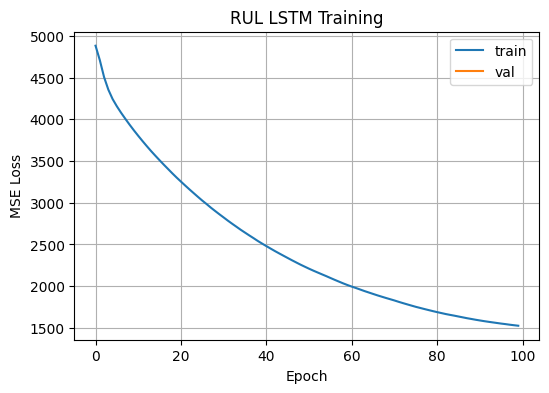

In [13]:
plt.figure(figsize=(6, 4))
plt.plot(train_losses, label="train")
plt.plot(val_losses, label="val")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("RUL LSTM Training")
plt.grid(True)
plt.legend()
plt.show()


In [14]:
# 테스트 세트 평가 (MAE)를 계산하는 코드를 작성해 봅시다.
from sklearn.metrics import mean_absolute_error
import numpy as np

# TODO: test_X, test_y로부터 텐서를 만들고 DataLoader를 구성하세요.
# 힌트: train/val에서 사용한 to_tensor, TensorDataset, DataLoader 패턴을 그대로 사용하면 됩니다.
# test_x_t, test_y_t = ...
# test_loader = DataLoader(TensorDataset(test_x_t, test_y_t), batch_size=batch_size, shuffle=False)

# TODO: model.eval() 모드에서 test_loader를 순회하며 예측값과 실제값을 모으세요.
# preds_list = []
# targets_list = []
# with torch.no_grad():
#     for xb, yb in test_loader:
#         xb = xb.to(device)
#         preds = model(xb).cpu().numpy()
#         preds_list.append(preds)
#         targets_list.append(yb.numpy())

# TODO: np.concatenate를 이용해 y_pred, y_true를 만들고, MAE를 계산/출력하세요.
# y_pred = ...
# y_true = ...
# mae = mean_absolute_error(y_true, y_pred)
# print("Test MAE:", mae)
raise NotImplementedError("테스트 평가 코드를 작성하세요.")


Test MAE: 56.74498748779297
